In [ ]:
# Importação de bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
# Importação do Dataset

df=pd.read_csv('/content/Walmart.csv')
df.head(10)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


In [ ]:
df['dia'] = df['Date'].str[0:2].astype('int32')
df['mes'] = df['Date'].str[3:5].astype('int32')
df['ano'] = df['Date'].str[6:10]
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,dia,mes,ano
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010


In [ ]:
# Verificando o tipo de dado
df_sum = df.groupby(['Store','ano']).sum().sort_values(by='Weekly_Sales', ascending=False)
df_sum

Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price           CPI  \
Store ano                                                                       
4     2011  1.110923e+08             4      3183.23     178.008   6709.679444   
20    2011  1.098370e+08             4      2782.85     188.692  10853.830025   
14    2011  1.060963e+08             4      2904.65     188.692   9677.898452   
      2010  1.054622e+08             4      2771.68     137.417   8752.684689   
13    2011  1.045375e+08             4      2617.70     180.167   6709.679444   
...                  ...           ...          ...         ...           ...   
44    2010  1.360752e+07             4      2562.42     135.880   6066.353364   
36    2012  1.328647e+07             2      3166.08     153.239   9474.541246   
33    2011  1.295784e+07             4      3900.69     194.090   6709.679444   
      2010  1.276683e+07             4      3670.87     145.862   6066.353364   
      2012  1.143555e+07             2      3400.57     171.405   5625.159924   

            Unemployment  dia  mes  
Store ano                           
4     2011       301.293  806  344  
20    2011       376.749  806  344  
14    2011       444.910  806  344  
      2010       423.418  754  341  
13    2011       362.523  806  344  
...                  ...  ...  ...  
44    2010       376.580  754  341  
36    2012       296.040  682  237  
33    2011       442.661  806  344  
      2010       462.102  754  341  
      2012       315.478  682  237  

[135 rows x 8 columns]

In [ ]:
#Separar os DF em ano e depois juntar com as médias de cada loja em cada ano 

df_2010 = df[df['ano'] == '2010']
df_2011 = df[df['ano'] == '2011']
df_2012 = df[df['ano'] == '2012']

df_2010 = df_2010.groupby('Store').sum().reset_index()
df_2011 = df_2011.groupby('Store').sum().reset_index()
df_2012 = df_2012.groupby('Store').sum().reset_index()

df_all = df_2010.merge(df_2011, on='Store')
df_all = df_all.merge(df_2012, on='Store')
df_all = df_all.drop(columns=['Holiday_Flag_x', 'Temperature_x',
       'Fuel_Price_x', 'CPI_x', 'Unemployment_x', 'dia_x', 'mes_x', 'Holiday_Flag_y', 'Temperature_y', 'Fuel_Price_y',
       'CPI_y', 'Unemployment_y', 'dia_y', 'mes_y',
       'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment',
       'dia', 'mes'])

df_all = df_all.rename(columns={"Weekly_Sales_x": "2010", "Weekly_Sales_y": "2011", "Weekly_Sales" : "2012"})

df_all.head()

,Store,2010,2011,2012
0,1,73278832.00,8.092192e+07,68202058.02
1,2,95277864.19,9.860788e+07,81496695.37
2,3,18745419.00,2.081688e+07,18024439.50
3,4,95680470.81,1.110923e+08,92771189.24
4,5,14836030.77,1.647082e+07,14168838.13


In [ ]:
df_2010_nh = df[df['Holiday_Flag'] == 0]
df_2011_nh = df[df['Holiday_Flag'] == 0]
df_2012_nh = df[df['Holiday_Flag'] == 0]

<AxesSubplot:>

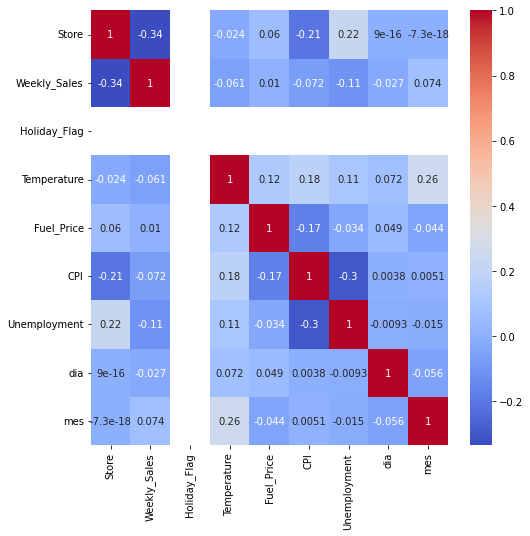

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(df_2010_nh.corr(),annot = True, cmap='coolwarm')

<AxesSubplot:>

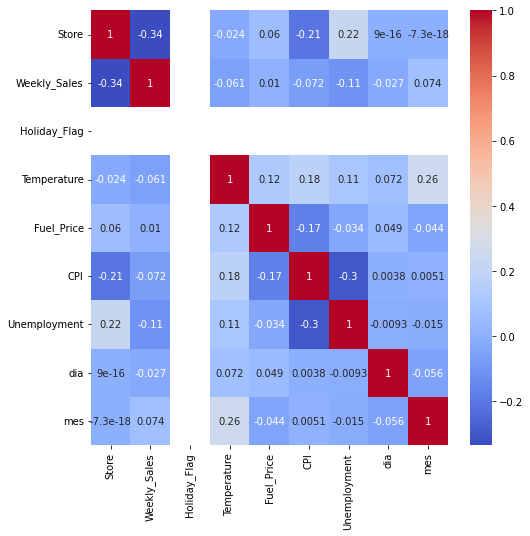

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(df_2011_nh.corr(),annot = True, cmap='coolwarm')

<AxesSubplot:>

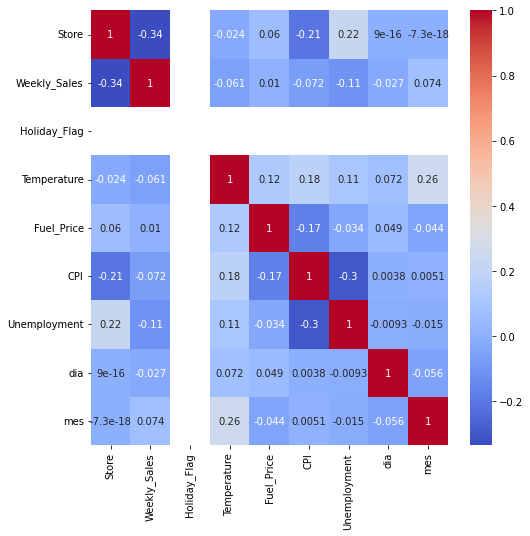

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(df_2012_nh.corr(),annot = True, cmap='coolwarm')

In [ ]:
df_date = df.groupby('Date').mean().reset_index()

px.line(df_date, x='Date', y='Weekly_Sales')

# Pergunta 1 - Formatação da data. Como formatar a data para o padrão brasileiro?

In [ ]:
# Converter colune "Date" para datatime

df['Date'] = pd.to_datetime(df['Date'])
df.head(10)

/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning:

Parsing '19-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning:

Parsing '26-02-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning:

Parsing '19-03-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning:

Parsing '26-03-2010' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.

/usr/local/lib/python3.9/dist-packages/pandas/core/tools/datetimes.py:1047: UserWarning:

Parsing '16-04-2010' in DD/MM/YYYY format. Provide format or speci

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,dia,mes,ano
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010
5,1,2010-12-03,1439541.59,0,57.79,2.667,211.380643,8.106,12,3,2010
6,1,2010-03-19,1472515.79,0,54.58,2.720,211.215635,8.106,19,3,2010
7,1,2010-03-26,1404429.92,0,51.45,2.732,211.018042,8.106,26,3,2010
8,1,2010-02-04,1594968.28,0,62.27,2.719,210.820450,7.808,2,4,2010
9,1,2010-09-04,1545418.53,0,65.86,2.770,210.622857,7.808,9,4,2010


In [ ]:
# Criando as colunas de Data, mês e ano

df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.weekday
df['Week'] = df['Date'].dt.week
df['Month'] = df['Date'].dt.month
df['Year']  = df['Date'].dt.year
df.drop('Date',axis=1,inplace=True)
df.head()

<ipython-input-13-4fa16d7f4293>:5: FutureWarning:

Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.



,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,dia,mes,ano,Day,Week,Month,Year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010,6,17,5,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010,3,48,12,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010,4,7,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010,4,8,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010,0,18,5,2010


# Respondendo as peguntas

## 1 - Qual o preço médio de venda semanal por loja?

## 2 - Qual o atributo que tem maior correlação (positiva ou negativa) com o número de vendas? (E que faça sentido)

## 3 - Da loja com maior venda acumulada (soma de vendas de todo o período), quantas semanas do ano ele ultrapassou a média do período?

In [ ]:
df.groupby('Store').sum().sort_values(by ='Weekly_Sales')

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,dia,mes,Day,Week,Month,Year
Store,,,,,,,,,,,,
33,3.716022e+07,10,10972.13,511.357,18401.192733,1220.241,2242,922,511,3718,926,287568
44,4.329309e+07,10,7678.69,469.919,18401.192733,963.194,2242,922,511,3718,926,287568
5,4.547569e+07,10,9925.65,460.417,30968.878137,900.243,2242,922,511,3718,926,287568
36,5.341221e+07,10,10175.93,458.201,30706.256907,1125.274,2242,922,511,3718,926,287568
38,5.515963e+07,10,10047.58,515.718,18401.192733,1875.657,2242,922,511,3718,926,287568
3,5.758674e+07,10,10215.09,460.417,31372.988971,1026.309,2242,922,511,3718,926,287568
30,6.271689e+07,10,9845.21,460.417,30837.422420,1090.210,2242,922,511,3718,926,287568
37,7.420274e+07,10,10175.93,460.417,30706.256907,1125.274,2242,922,511,3718,926,287568
16,7.425243e+07,10,6439.30,463.543,27693.986741,926.353,2242,922,511,3718,926,287568


In [ ]:
df_33.describe()

## 4 - Faça um gráfico com as vendas máximas, mínimas e médias de todas as lojas ao longo do tempo. Ressalte de alguma forma, o período de feriados mencionados acima.

## 5 - Pensando na expansão de uma das lojas, que loja você escolheria e o por que?
